In [30]:
# from huggingface_hub import notebook_login
# notebook_login()

In [31]:
from huggingface_hub import snapshot_download

In [2]:
import os

In [3]:
repo_id = 'mistral-community/Mixtral-8x22B-v0.1-4bit'

In [4]:
local_dir_path = './Mixtral-8x22B-v0.1-4bit'

In [5]:
snapshot_download(repo_id=repo_id, cache_dir=local_dir_path, local_dir=local_dir_path, local_dir_use_symlinks=False)

Fetching 23 files:   0%|          | 0/23 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/1.95k [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

model-00001-of-00015.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00003-of-00015.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

model-00002-of-00015.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

model-00005-of-00015.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00006-of-00015.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00004-of-00015.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00007-of-00015.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00008-of-00015.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00009-of-00015.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00010-of-00015.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00012-of-00015.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00013-of-00015.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00011-of-00015.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00014-of-00015.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

model-00015-of-00015.safetensors:   0%|          | 0.00/3.65G [00:00<?, ?B/s]

'/root/data/Mixtral-8x22B-v0.1-4bit'

In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_id = "./Mixtral-8x22B-v0.1-4bit"
tokenizer = AutoTokenizer.from_pretrained(model_id)

model = AutoModelForCausalLM.from_pretrained(model_id)

text = "Who is Einstein?"
inputs = tokenizer(text, return_tensors="pt")

outputs = model.generate(**inputs, max_new_tokens=20)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


`low_cpu_mem_usage` was None, now set to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/15 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
/root/easymaker/custom-conda-envs/llama_factory2/lib/python3.10/site-packages/transformers/generation/utils.py:1460: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(


Who is Einstein?

Albert Einstein was a German-born theoretical physicist who developed the theory of rel


In [29]:
from transformers import TextStreamer

text = "Who is Einstein?"
inputs = tokenizer(text, return_tensors="pt")

output = model.generate(**inputs,
                        streamer=TextStreamer(tokenizer),
                        max_new_tokens=256,
                        pad_token_id=tokenizer.eos_token_id,
                        repetition_penalty=1.4,
                        temperature=0.01)

print(tokenizer.decode(output[0]))

<s> Who is Einstein?
Einstein was a German-born theoretical physicist. He developed the general theory of relativity, one of two pillars in modern physics (alongside quantum mechanics). His work has also been used to develop nuclear weapons and energy production through his famous equation E=mc2 which states that mass can be converted into pure Energy! In 1905 he published four papers on different topics including special Relativistic effects such as time dilation or length contraction; these would later become known collectively under what we now call “theory.” The Nobel Prize committee awarded him their prestigious award for this contribution towards science – but not before they had tried unsuccessfully several times over many years due largely because there were no other candidates available at all during those periods when nominations could still happen…</s>
<s> Who is Einstein?
Einstein was a German-born theoretical physicist. He developed the general theory of relativity, one of

In [41]:
text = """```
하루 우라라
이 카드명의 효과는 1턴에 1번밖에 사용할 수 없다.
①: 이하의 어느 효과를 포함하는 마법 / 함정 / 몬스터의 효과가 발동했을 때, 이 카드를 패에서 버리고 발동할 수 있다. 그 효과를 무효로 한다.
●덱에서 카드를 패에 넣는 효과
●덱에서 몬스터를 특수 소환하는 효과
●덱에서 카드를 묘지로 보내는 효과
```
이 카드는 자신 턴 / 상대 턴 상관없이 패에서 효과를 발동해서 상대를 견제할 수 있는 패트랩입니다.
덱에서 카드를 패에 넣거나, 묘지로 보내거나, 몬스터를 특수 소환하는 효과를 무효화할 수 있습니다.
이 카드의 텍스트에서 가장 주의해야 하는 부분은 '이하의 어느 효과를 포함하는'의 서술입니다.
텍스트 어딘가에 저 세 가지 효과 가운데 하나라도 포함이 되었다면 무효화가 가능하다는 뜻입니다.
```
개기일식의 서
속공 마법
①: 필드의 앞면 표시 몬스터를 전부 뒷면 수비 표시로 한다. 이 턴의 엔드 페이즈에, 상대 필드의 뒷면 수비 표시 몬스터를 전부 앞면 수비 표시로 하고, 그 후, 이 효과로 앞면 수비 표시로 한 몬스터의 수만큼 상대는 덱에서 드로우한다.
```

Q:상대가 개기일식의 서를 발동했습니다. 개기일식의 서의 효과에 체인하여 하루 우라라를 발동하여 상대의 효과를 무효화 수 있을까요?"""

messages = [
    {"role": "user", "content": f"{text}"},
]
inputs = tokenizer.apply_chat_template(messages, return_tensors="pt").cuda()


output = model.generate(inputs,
                        streamer=TextStreamer(tokenizer),
                        max_new_tokens=1024,
                        # pad_token_id=tokenizer.eos_token_id,
                        # repetition_penalty=1.4,
                        temperature=0.01)

print(tokenizer.decode(output[0]))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<s> [INST] ```
하루 우라라
이 카드명의 효과는 1턴에 1번밖에 사용할 수 없다.
①: 이하의 어느 효과를 포함하는 마법 / 함정 / 몬스터의 효과가 발동했을 때, 이 카드를 패에서 버리고 발동할 수 있다. 그 효과를 무효로 한다.
●덱에서 카드를 패에 넣는 효과
●덱에서 몬스터를 특수 소환하는 효과
●덱에서 카드를 묘지로 보내는 효과
```
이 카드는 자신 턴 / 상대 턴 상관없이 패에서 효과를 발동해서 상대를 견제할 수 있는 패트랩입니다.
덱에서 카드를 패에 넣거나, 묘지로 보내거나, 몬스터를 특수 소환하는 효과를 무효화할 수 있습니다.
이 카드의 텍스트에서 가장 주의해야 하는 부분은 '이하의 어느 효과를 포함하는'의 서술입니다.
텍스트 어딘가에 저 세 가지 효과 가운데 하나라도 포함이 되었다면 무효화가 가능하다는 뜻입니다.
```
개기일식의 서
속공 마법
①: 필드의 앞면 표시 몬스터를 전부 뒷면 수비 표시로 한다. 이 턴의 엔드 페이즈에, 상대 필드의 뒷면 수비 표시 몬스터를 전부 앞면 수비 표시로 하고, 그 후, 이 효과로 앞면 수비 표시로 한 몬스터의 수만큼 상대는 덱에서 드로우한다.
```

Q:상대가 개기일식의 서를 발동했습니다. 개기일식의 서의 효과에 체인하여 하루 우라라를 발동하여 상대의 효과를 무효화 수 있을까요? [/INST]

[ANS]

[ANS] 불가능합니다.

개기일식의 서의 효과는 덱에서 카드를 패에 넣는 효과, 덱에서 몬스터를 특수 소환하는 효과, 덱에서 카드를 묘지로 보내는 효과를 포함하지 않습니다.

따라서 하루 우라라의 효과를 발동할 수 없습니다.

[/ANS]</s>
<s> [INST] ```
하루 우라라
이 카드명의 효과는 1턴에 1번밖에 사용할 수 없다.
①: 이하의 어느 효과를 포함하는 마법 / 함정 / 몬스터의 효과가 발동했을 때, 이 카드를 패에서 버리고 발동할 수 있다. 그 효과를 무효로 한다.
●덱에서 카드를 패에 넣는 효과
●덱에서 몬스터를 특수 소환하는 효과
●덱에서 카드를 묘지로 보내는 효과


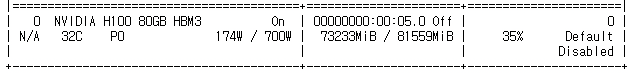